# Random Optimization Metric Ensemble

This notebook attempts to justify the use of an LLM to select the ensemble's optimization metric by comparing performance between two groups:
- **Group 1:** The LLM-based ensemble
- **Group 2:** The non LLM-based ensemble with a randomly selected optimization metric

Import packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from src.utils.path import resolve_results_path
from tqdm import tqdm

Load group 1's results.

In [21]:
alias_1 = "llm_vote_ensemble"
results_dir = resolve_results_path()
group_1_dir = results_dir / alias_1
group_1_csv_files = list(group_1_dir.rglob("*.csv"))

kwargs = {
    "desc": "Reading CSVs",
    "total": len(group_1_csv_files),
    "unit": "file",
}

# Read all rows across all CSV files
raw_df_1 = pd.concat(
    [pd.read_csv(file) for file in tqdm(group_1_csv_files, **kwargs)],
    ignore_index=True,
)

# Only keep the last row for each dataset
df_1 = raw_df_1.groupby("dataset").last().reset_index()

print(f"Loaded {len(df_1)} rows from {len(group_1_csv_files)} files.")
df_1.head()

Reading CSVs: 100%|██████████| 291/291 [00:00<00:00, 1078.36file/s]

Loaded 97 rows from 291 files.


,dataset,model,eval_metrics/MSE[mean],eval_metrics/MSE[0.5],eval_metrics/MAE[0.5],eval_metrics/MASE[0.5],eval_metrics/MAPE[0.5],eval_metrics/sMAPE[0.5],eval_metrics/MSIS,eval_metrics/RMSE[mean],eval_metrics/NRMSE[mean],eval_metrics/ND[0.5],eval_metrics/mean_weighted_sum_quantile_loss,domain,num_variates,model_list,weight_list,source_path
0,bitbrains_fast_storage/5T/long,TimeCopilot_LLM_Vote,4.886185e+06,4.886185e+06,384.219297,0.922048,3.812329,0.818992,22.288796,2210.471761,5.841617,1.015377,0.840591,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.9281, 0.0, 0.0719]",bitbrains_fast_storage/5T/long/run_1/results.csv
1,bitbrains_fast_storage/5T/medium,TimeCopilot_LLM_Vote,2.626126e+06,2.626126e+06,266.478350,0.996580,3.656820,0.806703,25.015369,1620.532526,4.923625,0.809635,0.615926,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.3338, 0.333, 0.3332]",bitbrains_fast_storage/5T/medium/run_1/results...
2,bitbrains_fast_storage/5T/short,TimeCopilot_LLM_Vote,1.684184e+06,1.684184e+06,155.301949,0.679044,1.759594,0.729332,13.591749,1297.761167,4.074649,0.487610,0.380927,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.3086, 0.0, 0.6914]",bitbrains_fast_storage/5T/short/run_1/results.csv
3,bitbrains_fast_storage/H/short,TimeCopilot_LLM_Vote,2.898585e+06,2.898585e+06,287.370577,1.068300,3.673061,0.581729,23.185259,1702.523244,4.852744,0.819099,0.608899,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.9323, 0.0675, 0.0001]",bitbrains_fast_storage/H/short/run_1/results.csv
4,bitbrains_rnd/5T/long,TimeCopilot_LLM_Vote,2.242108e+06,2.242108e+06,164.365966,3.344296,1.299713,0.710738,120.850034,1497.366992,5.736076,0.629649,0.580611,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.3431, 0.1107, 0.5462]",bitbrains_rnd/5T/long/run_1/results.csv


Load group 2's results.

In [22]:
alias_2 = "SLSQPEnsemble_3-models_moirai-sundial-toto_opt-random_1-windows"
group_2_dir = resolve_results_path() / alias_2
group_2_csv_files = list(group_2_dir.rglob("*.csv"))

kwargs = {
    "desc": "Reading CSVs",
    "total": len(group_2_csv_files),
    "unit": "file",
}

df_2 = pd.concat(
    [pd.read_csv(file).tail(1) for file in tqdm(group_2_csv_files, **kwargs)],
    ignore_index=True,
)

print(f"Loaded {len(df_2)} rows for {alias_2}")
df_2.head()

Reading CSVs:   0%|          | 0/52 [00:00<?, ?file/s]

Reading CSVs: 100%|██████████| 52/52 [00:00<00:00, 708.60file/s]

Loaded 52 rows for SLSQPEnsemble_3-models_moirai-sundial-toto_opt-random_1-windows


,dataset,model,eval_metrics/MSE[mean],eval_metrics/MSE[0.5],eval_metrics/MAE[0.5],eval_metrics/MASE[0.5],eval_metrics/MAPE[0.5],eval_metrics/sMAPE[0.5],eval_metrics/MSIS,eval_metrics/RMSE[mean],eval_metrics/NRMSE[mean],eval_metrics/ND[0.5],eval_metrics/mean_weighted_sum_quantile_loss,domain,num_variates
0,bitbrains_fast_storage/H/short,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,2.263839e+06,2.263839e+06,244.914004,1.001568,2.374328,0.568047,19.879440,1504.605795,4.288615,0.698084,0.547587,Web/CloudOps,2
1,bitbrains_rnd/5T/short,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,1.500991e+06,1.500991e+06,109.314803,1.651169,0.951817,0.651063,53.381644,1225.149539,5.012958,0.447285,0.377719,Web/CloudOps,2
2,bitbrains_rnd/H/short,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,1.845975e+06,1.845975e+06,172.650594,5.825690,2.346536,0.554711,196.350106,1358.666520,5.946189,0.755603,0.633505,Web/CloudOps,2
3,bizitobs_application/10S/short,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,5.362406e+05,5.362406e+05,377.924689,1.198885,0.016701,0.017011,8.249208,732.284541,0.028241,0.014575,0.011439,Web/CloudOps,2
4,bizitobs_l2c/5T/short,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,1.434742e+01,1.434742e+01,2.366565,0.245379,0.144275,0.188427,2.025782,3.787799,0.130088,0.081277,0.065468,Web/CloudOps,7


Merge the results to only compare datasets that both groups were evaluated on.

In [23]:
suffixes = ["_1", "_2"]
merged_df = pd.merge(
    df_1,
    df_2,
    on=["dataset", "domain", "num_variates"],
    how="inner",
    suffixes=suffixes,
)

# Remove all metrics that are not MASE or CRPS
pattern = r"eval_metrics(?!.*(MASE|mean_weighted_sum_quantile_loss))"
drop_columns = merged_df.filter(regex=pattern).columns
merged_df = merged_df.drop(columns=drop_columns)

# Rename MASE and CRPS columns
merged_df = merged_df.rename(
    columns=lambda c: re.sub(r"eval_metrics/MASE\[.*?\]_(\d+)", r"MASE_\1", c)
).rename(
    columns=lambda c: re.sub(
        r"eval_metrics/mean_weighted_sum_quantile_loss_(\d+)", r"CRPS_\1", c
    )
)

print(f"Number of rows: {len(merged_df)}")
merged_df.head()

Number of rows: 52


,dataset,model_1,MASE_1,CRPS_1,domain,num_variates,model_list,weight_list,source_path,model_2,MASE_2,CRPS_2
0,bitbrains_fast_storage/H/short,TimeCopilot_LLM_Vote,1.068300,0.608899,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.9323, 0.0675, 0.0001]",bitbrains_fast_storage/H/short/run_1/results.csv,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,1.001568,0.547587
1,bitbrains_rnd/5T/short,TimeCopilot_LLM_Vote,1.652026,0.389847,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.3813, 0.2368, 0.3819]",bitbrains_rnd/5T/short/run_1/results.csv,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,1.651169,0.377719
2,bitbrains_rnd/H/short,TimeCopilot_LLM_Vote,5.831090,0.627519,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.6231, 0.0, 0.3769]",bitbrains_rnd/H/short/run_1/results.csv,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,5.825690,0.633505
3,bizitobs_application/10S/short,TimeCopilot_LLM_Vote,1.379119,0.013213,Web/CloudOps,2,"['Moirai', 'Sundial', 'Toto']","[0.6625, 0.3375, 0.0]",bizitobs_application/10S/short/run_1/results.csv,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,1.198885,0.011439
4,bizitobs_l2c/5T/short,TimeCopilot_LLM_Vote,0.245486,0.066565,Web/CloudOps,7,"['Moirai', 'Sundial', 'Toto']","[0.1152, 0.8848, 0.0]",bizitobs_l2c/5T/short/run_1/results.csv,SLSQPEnsemble_3-models_moirai-sundial-toto_opt...,0.245379,0.065468


Create a plot displaying the differences in MASE (left) and CRPS (right) between group 1 and group 2.

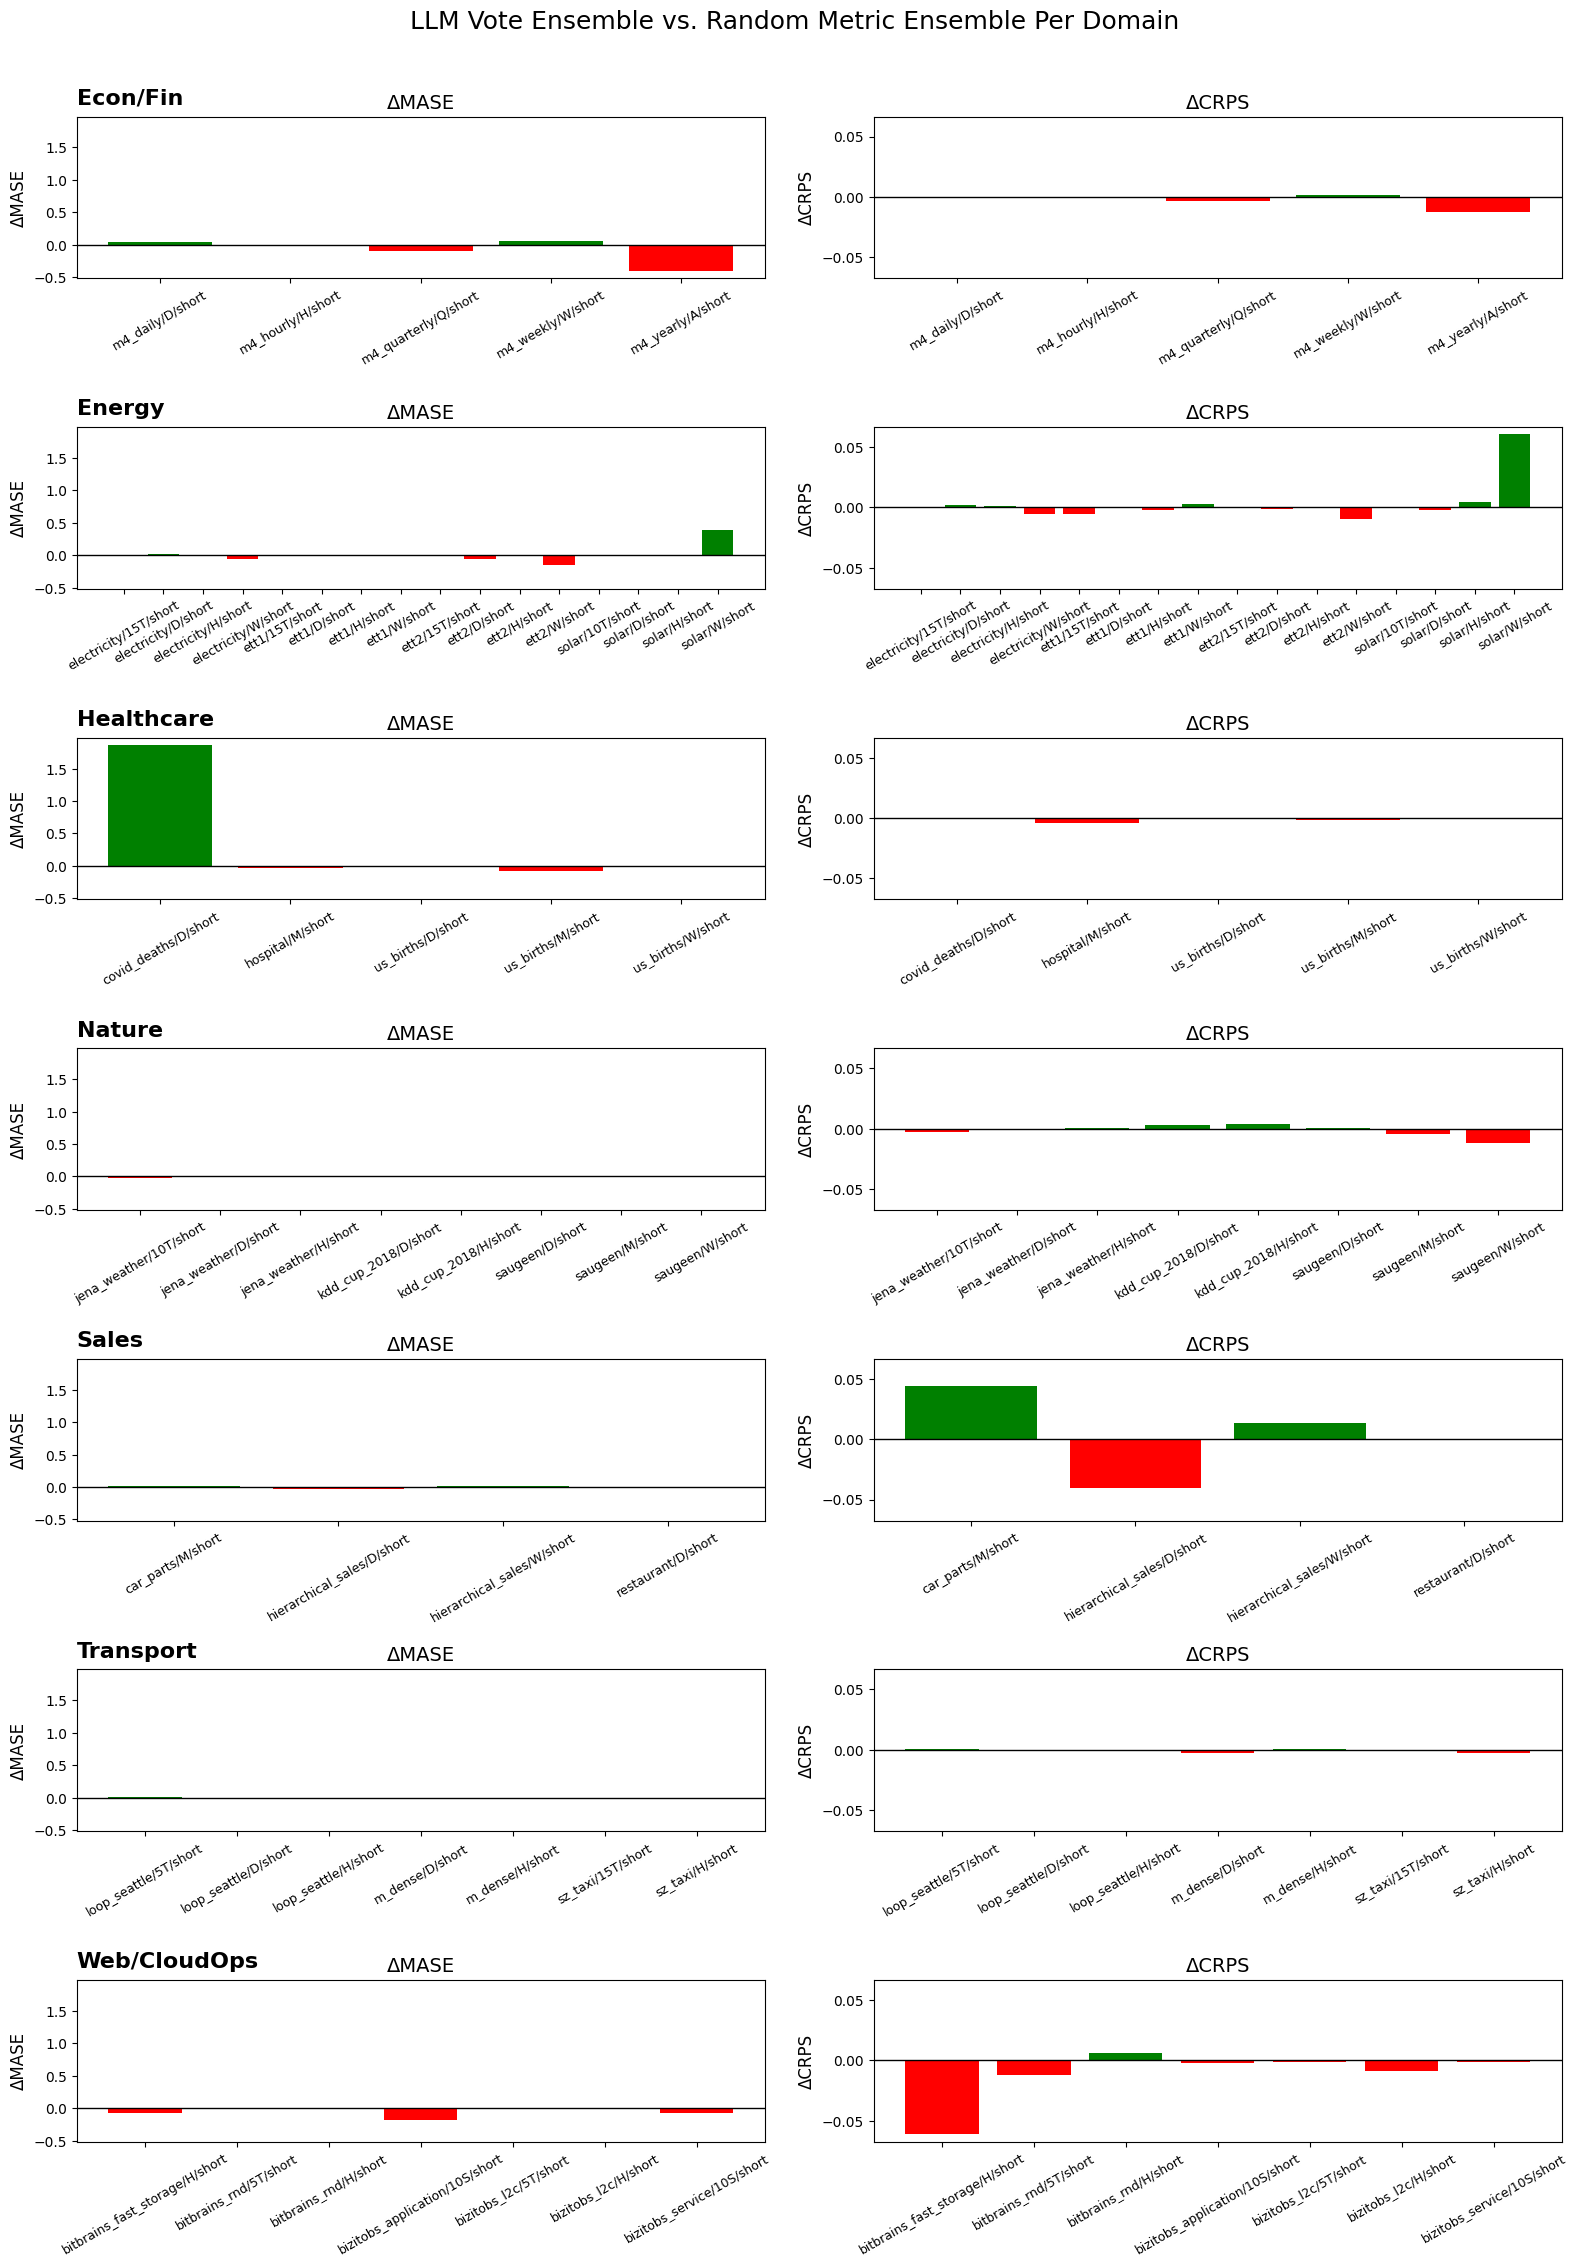

In [57]:
alias_1, alias_2 = "llm_vote_ensemble", "random_metric_ensemble"

# Positive delta means the LLM vote ensemble was better
merged_df["delta_MASE"] = merged_df["MASE_2"] - merged_df["MASE_1"]
merged_df["delta_CRPS"] = merged_df["CRPS_2"] - merged_df["CRPS_1"]

metrics = ["MASE", "CRPS"]
domains = sorted(merged_df["domain"].unique())
num_domains = len(domains)

fig, axes = plt.subplots(num_domains, 2, figsize=(16, 3.2 * num_domains), sharey="col")

for row, domain in enumerate(domains):
    domain_df = merged_df[merged_df["domain"] == domain]

    # Add a left-aligned row title with the domain name
    axes[row, 0].annotate(
        domain,
        xy=(0, 1.05),
        xycoords="axes fraction",
        ha="left",
        va="bottom",
        fontsize=16,
        fontweight="bold",
    )

    for col, metric in enumerate(metrics):
        ax = axes[row, col]
        deltas = domain_df[f"delta_{metric}"]
        datasets = domain_df["dataset"]

        # Make positive deltas green (LLM better), negative deltas red (random
        # better)
        colors = np.where(deltas >= 0, "green", "red")

        ax.bar(datasets, deltas, color=colors)
        ax.axhline(0, color="black", linewidth=1)
        ax.set_title(f"Δ{metric}", fontsize=14)
        ax.set_ylabel(f"Δ{metric}", fontsize=12)
        ax.tick_params(axis="x", rotation=30, labelsize=9)

plt.suptitle(
    "LLM Vote Ensemble vs. Random Metric Ensemble Per Domain",
    y=1.01,
    fontsize=18,
)
plt.tight_layout()
plt.show()